In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the the original image
original = cv2.imread('1.jpg', 0)

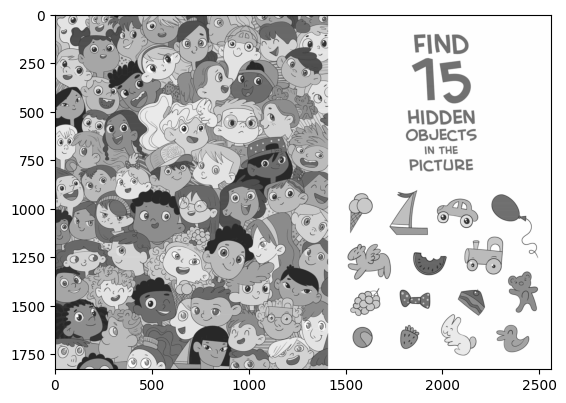

In [ ]:
# Show the original image
plt.imshow(original, cmap='gray')

In [ ]:
# Create a list to store object images
objects = []

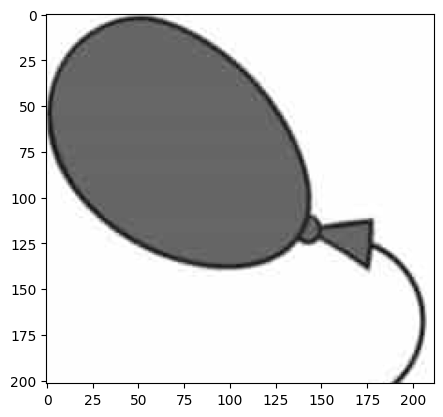

In [ ]:
# Take the balloon image
balloon = original[928:1130, 2248:2460]
# Show image of balloon
plt.imshow(balloon, cmap='gray')
# Add the balloon to the list
objects.append(balloon)

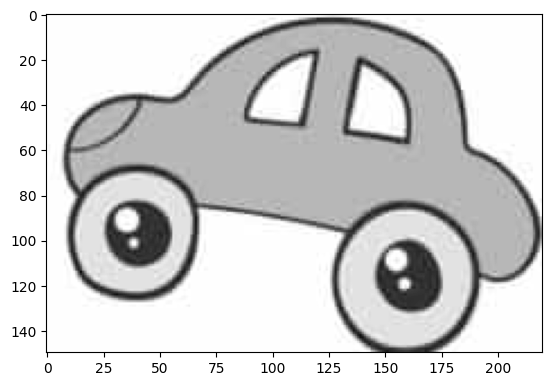

In [ ]:
# Take the car image
car = original[950:1100, 1960:2180]
# Show image of car
plt.imshow(car, cmap='gray')
# Add the car to the list
objects.append(car)

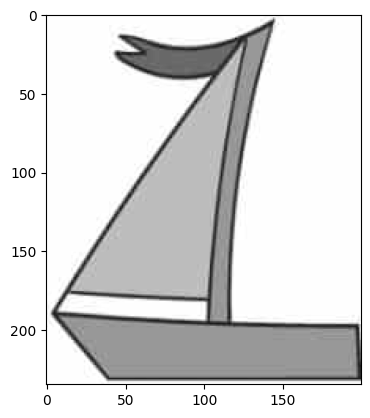

In [ ]:
# Take the boat image
boat = original[905:1140, 1720:1920]
# Show image of boat
plt.imshow(boat, cmap='gray')
# Add the boat to the list
objects.append(boat)

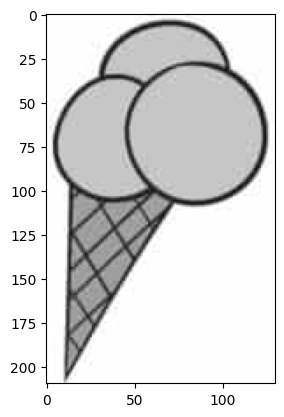

In [ ]:
# Take the ice-cream image
ice_cream = original[920:1130, 1510:1640]
# Show image of ice-cream
plt.imshow(ice_cream, cmap='gray')
# Add the ice-cream to the list
objects.append(ice_cream)

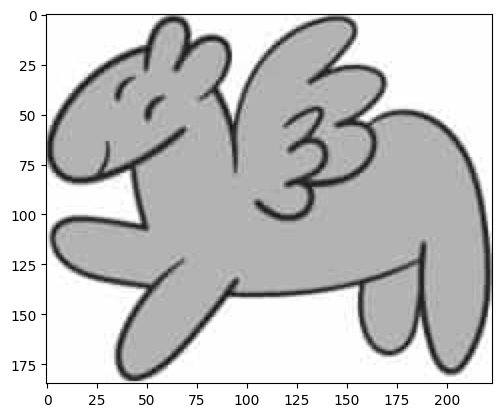

In [ ]:
# Take the horse image
horse = original[1184:1369, 1507:1730]
# Show image of horse
plt.imshow(horse, cmap='gray')
# Add the horse to the list
objects.append(horse)

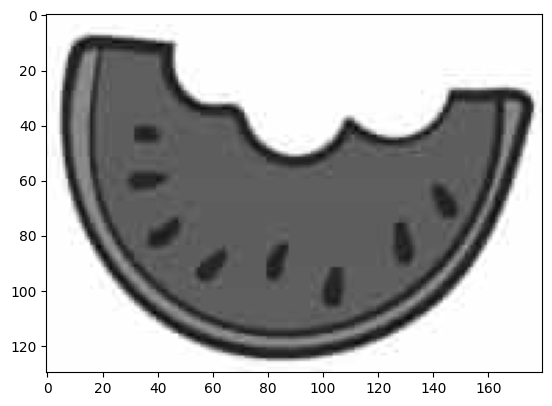

In [ ]:
# Take the watermelon image
watermelon = original[1220:1350, 1840:2020]
# Show image of watermelon
plt.imshow(watermelon, cmap='gray')
# Add the watermelon to the list
objects.append(watermelon)

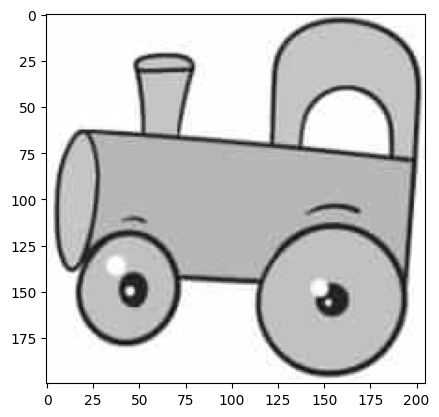

In [ ]:
# Take the train image
train = original[1145:1345, 2105:2310]
# Show image of train
plt.imshow(train, cmap='gray')
# Add the train to the list
objects.append(train)

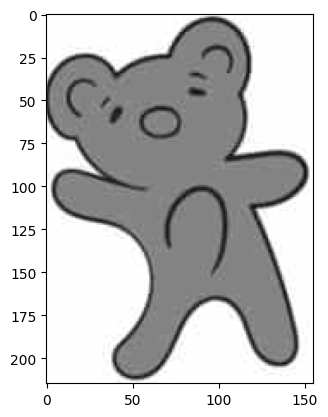

In [ ]:
# Take the teddy bear image
teddy_bear = original[1325:1540, 2335:2490]
# Show image of teddy bear
plt.imshow(teddy_bear, cmap='gray')
# Add the teddy bear to the list
objects.append(teddy_bear)

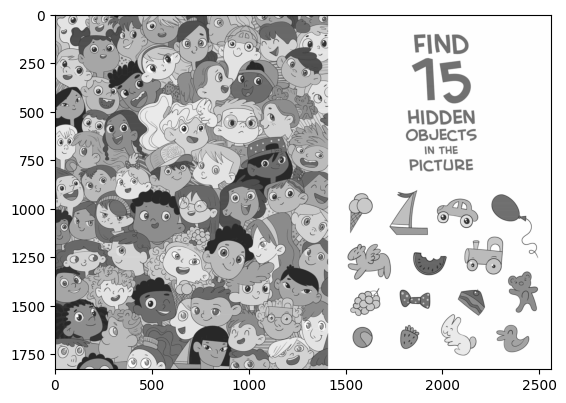

In [ ]:
# Show the original image
plt.imshow(original, cmap='gray')

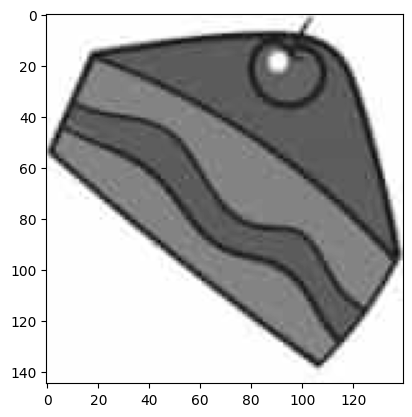

In [ ]:
# Take the cake image
cake = original[1415:1560, 2075:2215]
# Show image of cake
plt.imshow(cake, cmap='gray')
# Add the cake to the list
objects.append(cake)

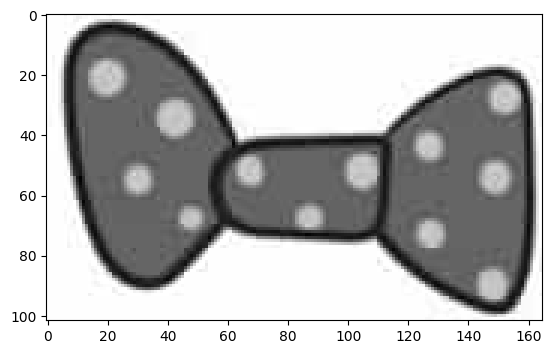

In [ ]:
# Take the tie image
tie = original[1418:1520, 1770:1935]
# Show image of tie
plt.imshow(tie, cmap='gray')
# Add the tie to the list
objects.append(tie)

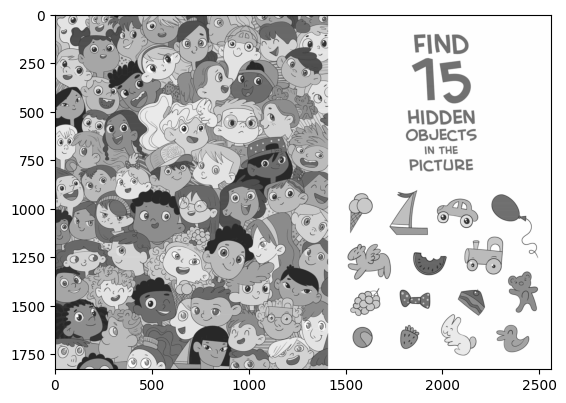

In [ ]:
# Show the original image
plt.imshow(original, cmap='gray')

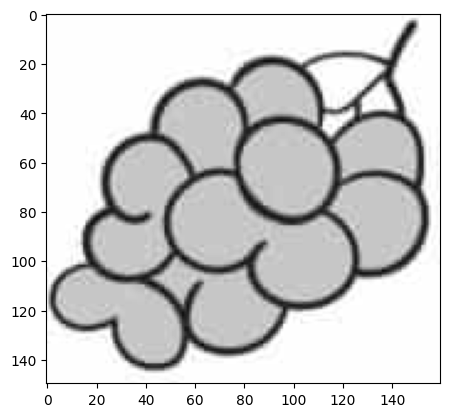

In [ ]:
# Take the grapes image
grapes = original[1410:1560, 1520:1680]
# Show image of grapes
plt.imshow(grapes, cmap='gray')
# Add the grapes to the list
objects.append(grapes)

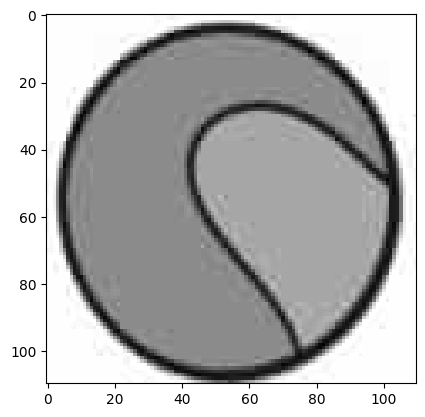

In [ ]:
# Take the ball image
ball = original[1610:1720, 1530:1640]
# Show image of ball
plt.imshow(ball, cmap='gray')
# Add the ball to the list
objects.append(ball)

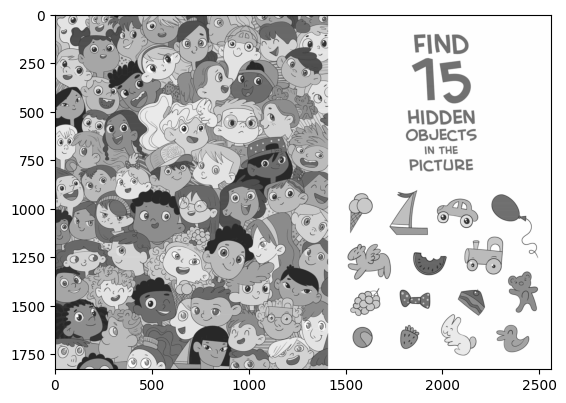

In [ ]:
# Show the original image
plt.imshow(original, cmap='gray')

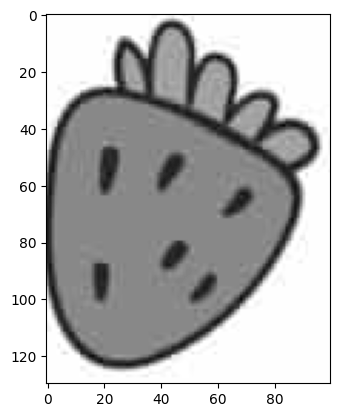

In [ ]:
# Take the strawberry image
strawberry = original[1600:1730, 1780:1880]
# Show image of strawberry
plt.imshow(strawberry, cmap='gray')
# Add the strawberry to the list
objects.append(strawberry)

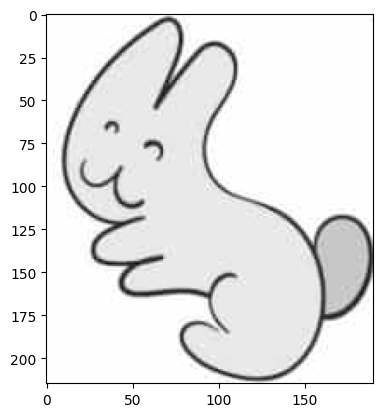

In [ ]:
# Take the rabbit image
rabbit = original[1545:1760, 1980:2170]
# Show image of rabbit
plt.imshow(rabbit, cmap='gray')
# Add the rabbit to the list
objects.append(rabbit)

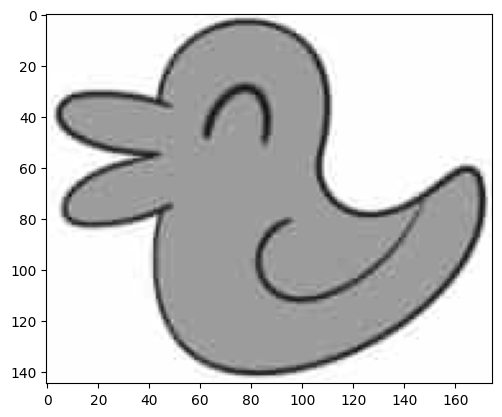

In [ ]:
# Take the duck image
duck = original[1600:1745, 2270:2445]
# Show image of duck
plt.imshow(duck, cmap='gray')
# Add the duck to the list
objects.append(duck)

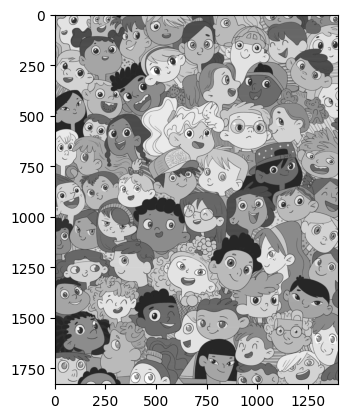

In [ ]:
# Take the target image
target = original[0:original.shape[0], 0:1400]
# Show the target image
plt.imshow(target, cmap='gray')

In [ ]:
# # Edge detection
# def edge_detection(image):
#     # Apply Gaussian blur
#     blur = cv2.GaussianBlur(image, (5,5), 0)
#     # Apply Canny edge detection
#     edges = cv2.Canny(blur, 0, 50)
#     return edges

def edge_detection(image):
    # Apply Gaussian blur with a larger kernel
    blur = cv2.GaussianBlur(image, (7, 7), 0)

    # Apply Canny edge detection with lower thresholds
    edges = cv2.Canny(blur, 0, 50)

    # Apply dilation to connect broken edges
    kernel = np.ones((3, 3), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    return edges


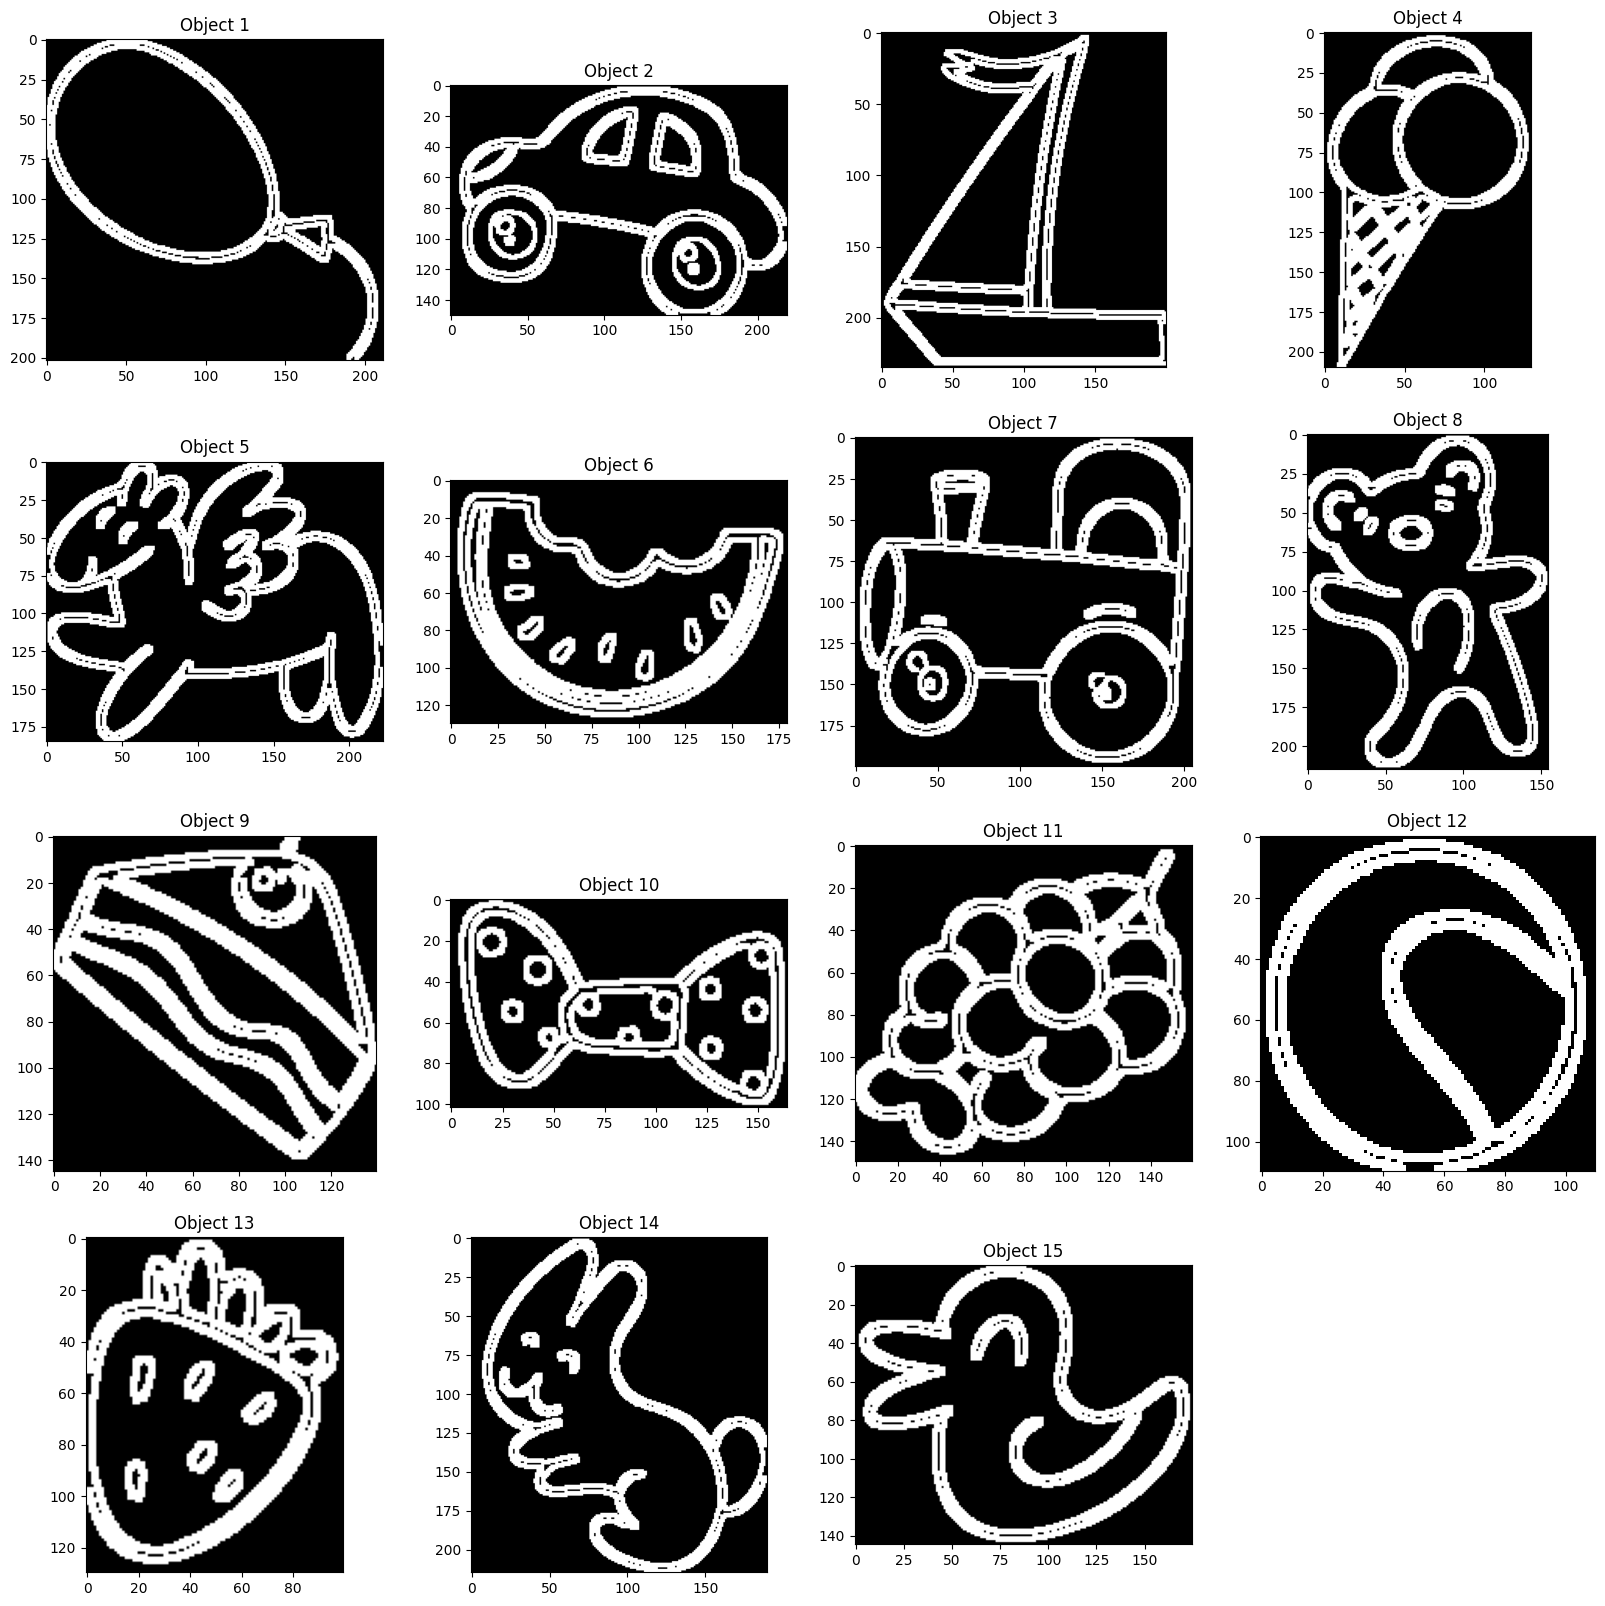

In [ ]:
# Apply edge detection to object images
object_edges = []
for obj in objects:
    object_edges.append(edge_detection(obj))

# Show the objects edge detection results by subplot
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
    plt.subplot(4, 4, i+1)
    plt.imshow(object_edges[i], cmap='gray')
    plt.title('Object ' + str(i+1))
plt.show()


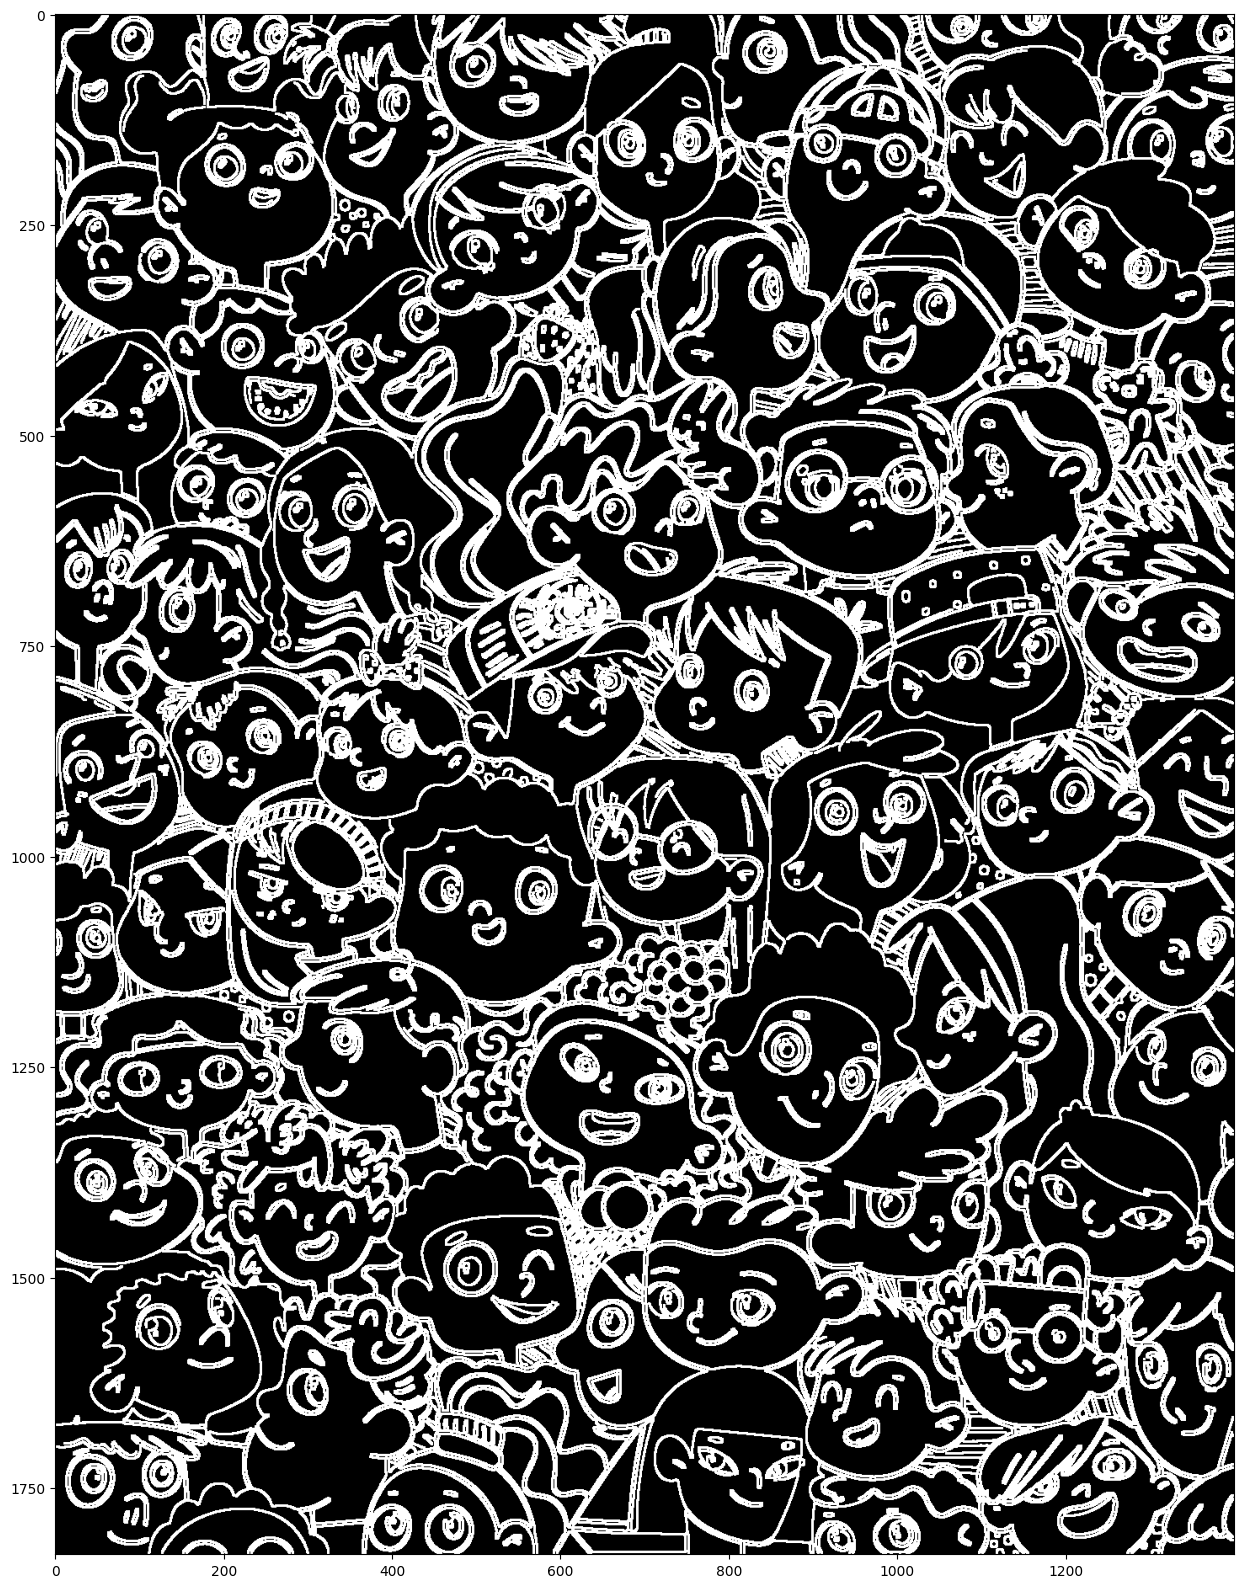

In [ ]:
# Apply edge detection to the target image
target_edges = edge_detection(target)
# Show the target edge detection result with a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

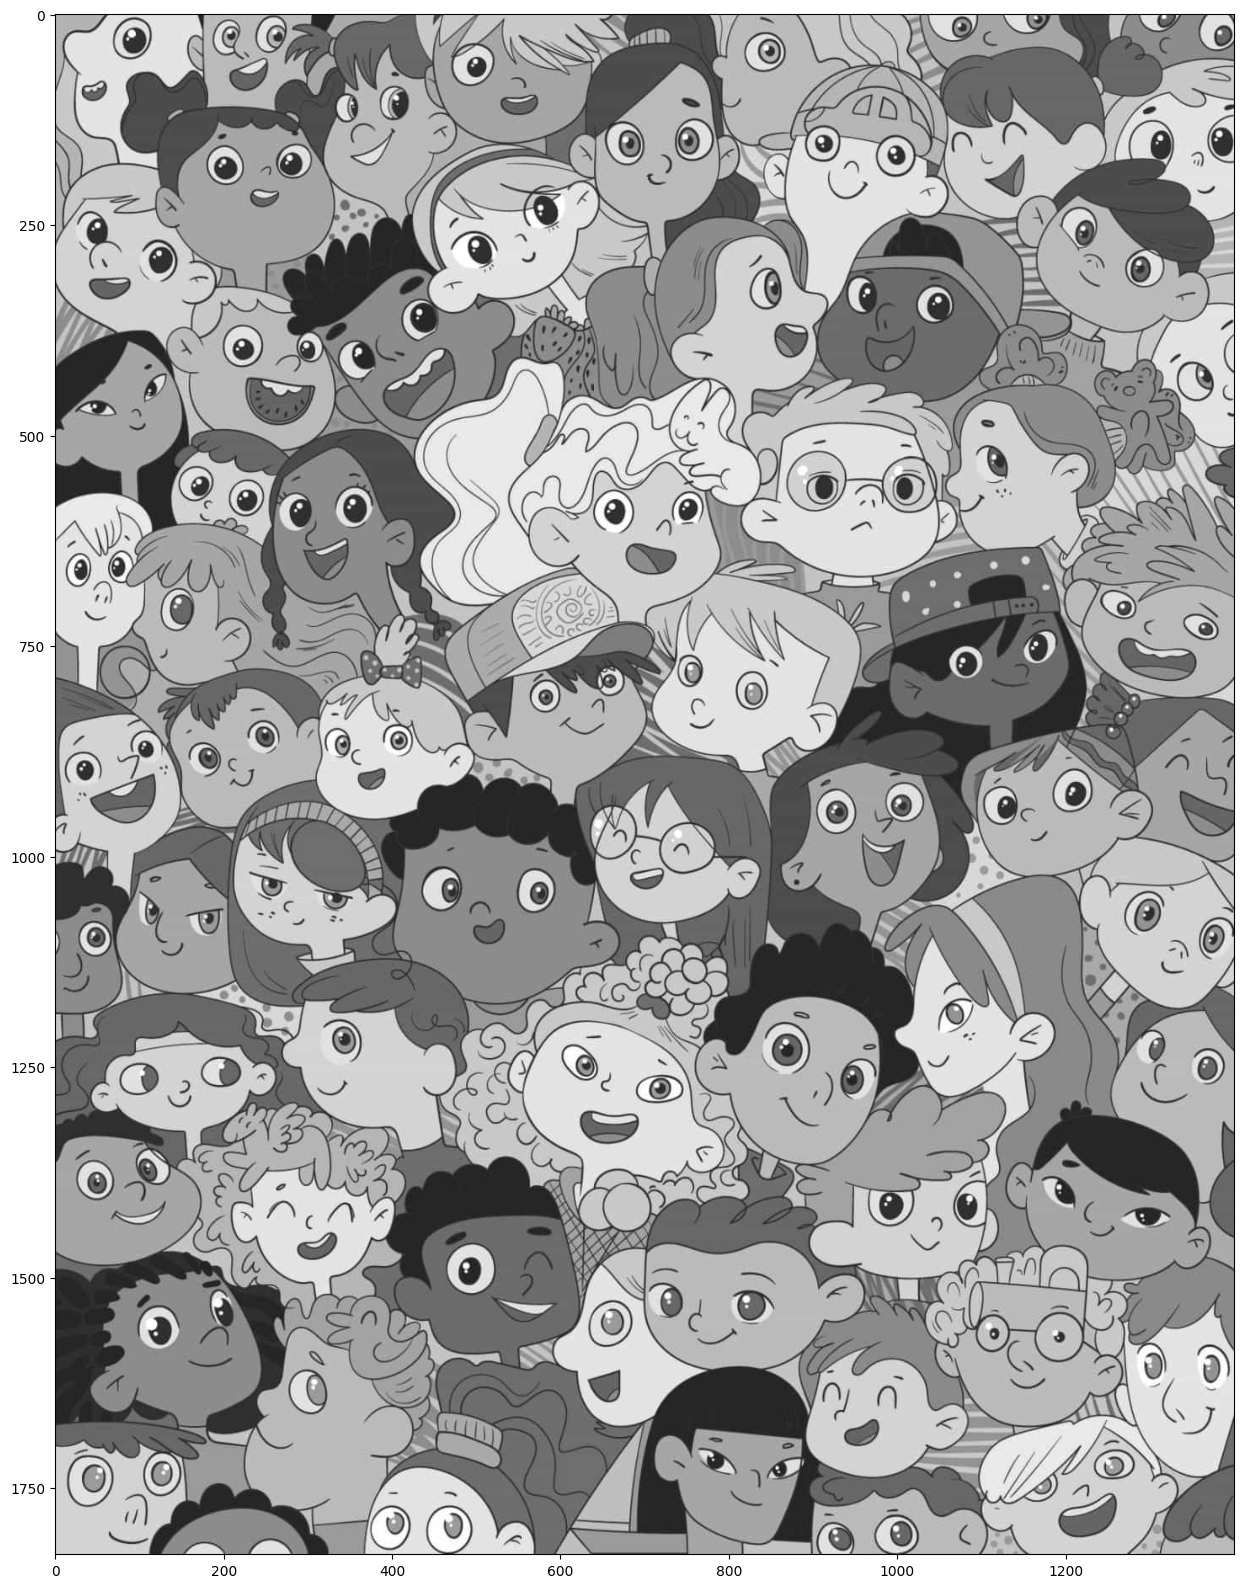

In [ ]:
# Show the target image
plt.figure(figsize=(20, 20))
plt.imshow(target, cmap='gray')

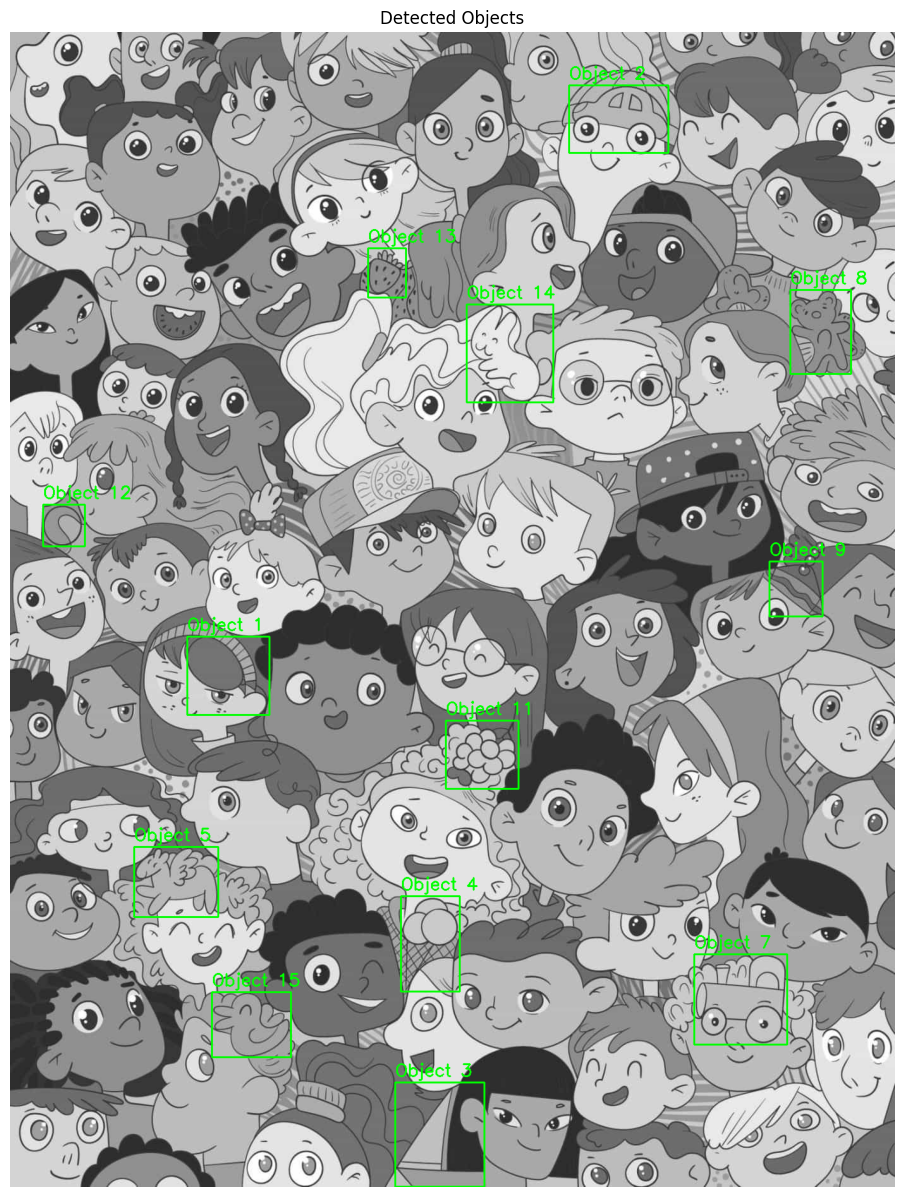

In [ ]:


def improved_template_matching(target, template, threshold=0.3):
    best_match = None
    best_score = -np.inf
    best_scale = 1.0

    for scale in np.linspace(0.6, 1, 100):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

        if resized_template.shape[0] > target.shape[0] or resized_template.shape[1] > target.shape[1]:
            continue

        res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if max_val > best_score:
            best_score = max_val
            best_match = max_loc
            best_scale = scale

    if best_score >= threshold:
        return best_match, best_scale
    else:
        return None, None

def find_objects(target, objects, threshold=0.4):
    target_edges = edge_detection(target)
    results = []

    for i, obj in enumerate(objects):
        obj_edges = edge_detection(obj)
        location, scale = improved_template_matching(target_edges, obj_edges, threshold)

        if location is not None:
            results.append((i, location, scale))

    return results

def draw_results(target, objects, results):
    target_copy = target.copy()
    target_copy = cv2.cvtColor(target_copy, cv2.COLOR_GRAY2RGB)

    for i, location, scale in results:
        obj = objects[i]
        w, h = int(obj.shape[1] * scale), int(obj.shape[0] * scale)
        x, y = location
        cv2.rectangle(target_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(target_copy, f'Object {i+1}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return target_copy

# Assuming 'original', 'target', and 'objects' are already defined
results = find_objects(target, objects)
result_image = draw_results(target, objects, results)

plt.figure(figsize=(15, 15))
plt.imshow(result_image)
plt.title('Detected Objects')
plt.axis('off')
plt.show()